Import Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import plotly.express as px
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )
sns.set_style('darkgrid')

Import Files

In [2]:
# package_tourism files
package_tourism = pd.read_csv('package_tourism.csv',delimiter=',')
print(package_tourism.shape)
package_tourism.head()

(100, 7)


,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [3]:
# tourism_rating files
tourism_rating = pd.read_csv('tourism_rating.csv',delimiter=',')
print(tourism_rating.shape)
tourism_rating.head()

(10000, 3)


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [4]:
# tourism_with_id files
tourism_with_id = pd.read_csv('tourism_with_id.csv',delimiter=',')
print(tourism_with_id.shape)
tourism_with_id.head(3)

(437, 13)


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3


In [5]:
# user files
user = pd.read_csv('user.csv',delimiter=',')
print(user.shape)
user.head()

(300, 3)


,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [6]:
# Import GeoJSON Data
file_geo = 'gadm36_IDN_1.json'
df_geo = gpd.read_file(file_geo)
df_geo.head(3)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66271 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59473 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96080 ..."


Data Cleaning

In [7]:
package_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Package         100 non-null    int64 
 1   City            100 non-null    object
 2   Place_Tourism1  100 non-null    object
 3   Place_Tourism2  100 non-null    object
 4   Place_Tourism3  100 non-null    object
 5   Place_Tourism4  66 non-null     object
 6   Place_Tourism5  39 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [8]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [9]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


drop 'Unnamed: 11','Unnamed: 12','Coordinate' columns because they not needed

In [10]:
tourism_with_id = tourism_with_id.drop(['Unnamed: 11','Unnamed: 12','Coordinate'],axis=1)

check for category column

In [11]:
tourism_with_id.groupby('Category').size() #size of each category

Category
Bahari                 47
Budaya                117
Cagar Alam            106
Pusat Perbelanjaan     15
Taman Hiburan         135
Tempat Ibadah          17
dtype: int64

In [12]:
tourism_with_id.loc[tourism_with_id['Time_Minutes'].isna(),'Category'].value_counts()
#total null of each category

Taman Hiburan         63
Budaya                56
Cagar Alam            52
Bahari                39
Tempat Ibadah         17
Pusat Perbelanjaan     5
Name: Category, dtype: int64

In [13]:
tourism_with_id = tourism_with_id.drop('Time_Minutes',axis=1) # too many missing data on this column

In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


Merge user and tourism_rating


In [15]:
user_tourism_rating = pd.merge(left=tourism_rating,right=user,on='User_Id')
user_tourism_rating

,User_Id,Place_Id,Place_Ratings,Location,Age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20
...,...,...,...,...,...
9995,300,425,2,"Ponorogo, Jawa Timur",26
9996,300,64,4,"Ponorogo, Jawa Timur",26
9997,300,311,3,"Ponorogo, Jawa Timur",26
9998,300,279,4,"Ponorogo, Jawa Timur",26


Data Engineering

In [16]:
user_tourism_rating['City'] = user_tourism_rating['Location'].apply(lambda x:x.split(',')[0])
user_tourism_rating['Province'] = user_tourism_rating['Location'].apply(lambda x:x.split(',')[1].strip())
user_tourism_rating = user_tourism_rating.drop('Location',axis=1)
user_tourism_rating.loc[user_tourism_rating.Province == 'DKI Jakarta','Province'] = 'Jakarta Raya'
user_tourism_rating.loc[user_tourism_rating.Province == 'DIY','Province'] = 'Yogyakarta'
user_tourism_rating.shape

(10000, 6)

Data Explanatory

Tourism's Ages

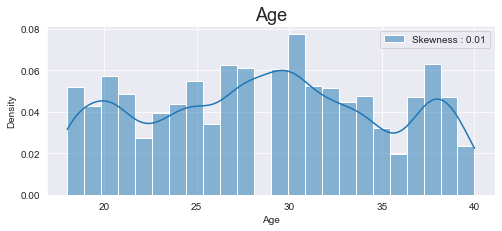

In [21]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.tight_layout(pad = 5)
sns.histplot(ax=ax,x = user_tourism_rating['Age'].dropna(),stat='density',kde=True,label = "Skewness : %.2f"%(user_tourism_rating['Age'].skew()))
ax.set_title('Age', fontsize = 18)
ax.legend(loc = 'best')
plt.show()

In [ ]:
tourism_with_id.head(3)

In [ ]:
user_tourism_rating.head(3)

In [22]:
province_tourism = df_geo.copy()
province_tourism = province_tourism.loc[province_tourism['NAME_1'].isin(user_tourism_rating.Province.unique())]
province_tourism

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.54920 ..."
6,IDN,Indonesia,IDN.7_1,Jakarta Raya,,,Propinisi,Province,31,ID.JK,"MULTIPOLYGON (((106.73563 -6.04014, 106.73592 ..."
8,IDN,Indonesia,IDN.9_1,Jawa Barat,,,Propinisi,Province,32,ID.JR,"MULTIPOLYGON (((108.68501 -6.76990, 108.68548 ..."
9,IDN,Indonesia,IDN.10_1,Jawa Tengah,,,Propinisi,Province,33,ID.JT,"MULTIPOLYGON (((108.88353 -7.74846, 108.88357 ..."
10,IDN,Indonesia,IDN.11_1,Jawa Timur,,,Propinisi,Province,35,ID.JI,"MULTIPOLYGON (((114.11237 -8.62003, 114.11242 ..."
30,IDN,Indonesia,IDN.31_1,Sumatera Selatan,,,Propinisi,Province,16,ID.SL,"MULTIPOLYGON (((106.16177 -3.29708, 106.16173 ..."
32,IDN,Indonesia,IDN.33_1,Yogyakarta,,,Propinisi,Province,34,ID.YO,"MULTIPOLYGON (((110.66244 -8.17778, 110.66256 ..."


In [23]:
value = user_tourism_rating.groupby('Province').size().values
province_tourism['Visitors'] = value

In [33]:
value = dict(user_tourism_rating.groupby('Province').size())
value 

{'Banten': 583,
 'Jakarta Raya': 1511,
 'Jawa Barat': 3845,
 'Jawa Tengah': 1444,
 'Jawa Timur': 822,
 'Sumatera Selatan': 848,
 'Yogyakarta': 947}

In [30]:
df_geo['Visitors'] = df_geo['NAME_1'].apply(lambda x: int(value[x]) if x in value.keys() else 0)

In [34]:
df_geo.head(10)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry,Visitors,coords
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66271 2.1...",0,"(97.12648970170963, 3.91033447)"
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59473 ...",0,"(115.27006232908559, -8.45560598)"
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96080 ...",0,"(107.9055363040837, -2.899278405)"
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.54920 ...",583,"(106.13333644092032, -6.4376955)"
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.35450 ...",0,"(102.47267181978891, -3.60203612)"
5,IDN,Indonesia,IDN.6_1,Gorontalo,,,Propinisi,Province,75,ID.GO,"MULTIPOLYGON (((121.41933 0.41357, 121.42094 0...",0,"(122.25433534226451, 0.673525955)"
6,IDN,Indonesia,IDN.7_1,Jakarta Raya,,,Propinisi,Province,31,ID.JK,"MULTIPOLYGON (((106.73563 -6.04014, 106.73592 ...",1511,"(106.84552654878168, -6.230001209999999)"
7,IDN,Indonesia,IDN.8_1,Jambi,,,Propinisi,Province,15,ID.JA,"MULTIPOLYGON (((104.40900 -0.85951, 104.40394 ...",0,"(102.58109682510255, -1.7523194549999999)"
8,IDN,Indonesia,IDN.9_1,Jawa Barat,,,Propinisi,Province,32,ID.JR,"MULTIPOLYGON (((108.68501 -6.76990, 108.68548 ...",3845,"(107.61163104775629, -6.868591785)"
9,IDN,Indonesia,IDN.10_1,Jawa Tengah,,,Propinisi,Province,33,ID.JT,"MULTIPOLYGON (((108.88353 -7.74846, 108.88357 ...",1444,"(109.85052163283187, -7.30723238)"


Visualization

<AxesSubplot:title={'center':'Indonesia Tourism Count'}>

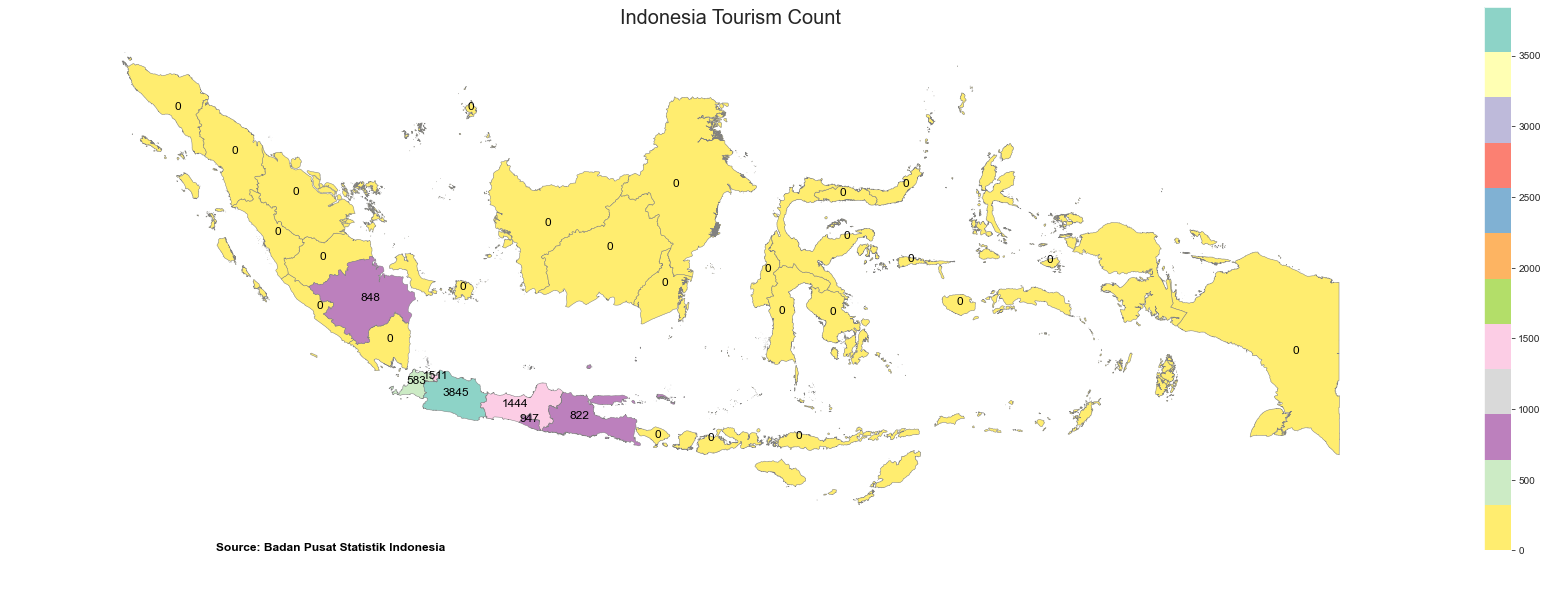

In [32]:
# Create variables that will be used in some parameters later 
values = 'Visitors'
values2 = "Indonesia Tourism Count"
# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))
# Set the value range for the choropleth map
vmin, vmax = df_geo[values].min(), df_geo[values].max()
# Remove the axis as we do not need it
ax.axis('off')
# Add a map title
title = '{}'.format(values2)
ax.set_title(title, fontdict={'fontsize':'20', 'fontweight':'10'})
# Create an annotation for the data source
ax.annotate('Source: Badan Pusat Statistik Indonesia', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, fontweight='bold', color='k')
# Add labels
df_geo['coords'] = df_geo['geometry'].apply(lambda x: x.representative_point().coords[:])
df_geo['coords'] = [coords[0] for coords in df_geo['coords']]
for idx, row in df_geo.iterrows():
  # ann = row['HASC_1']
  # ann += '\n'
  ann = str(row[values])
  # ann += '\n'
  plt.annotate(text=ann, xy=row['coords'],horizontalalignment='center',color='black',fontsize=12)
# Generate the map
df_geo.plot(column='Visitors', cmap='Set3_r', linewidth=0.5, ax=ax, edgecolor='0.5', norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=True)